In [1]:
from IPython.display import display, HTML, Image
from base64 import b64encode

from rmgpy.species import Species

In [2]:
def loadSpeciesDictionary(path):
    speciesDict = {}
    with open(path, 'r') as f:
        adjlist = ''
        for line in f:
            if line.strip() == '' and adjlist.strip() != '':
                # Finish this adjacency list
                species = Species().fromAdjacencyList(adjlist)
                #species.generateResonanceIsomers()
                label = species.label
                speciesDict[label] = species
                adjlist = ''
            else:
                if "InChI" in line:
                    line = line.split()[0] + '\n'
                if '//' in line:
                    index = line.index('//')
                    line = line[0:index]
                adjlist += line
        else: #reach end of file
            if adjlist.strip() != '':
                species = Species().fromAdjacencyList(adjlist)
                #species.generateResonanceIsomers()
                label = species.label
                speciesDict[label] = species

    return speciesDict

In [3]:
path = '/home/mjliu/Documents/Models/Naphthalene/ethane/run1/species_dictionary.txt'

speciesDict = loadSpeciesDictionary(path)

S(40869),
S(185),
C10H7(104),
S(41108),
S(42503),
S(32064),
S(37036),
S(29742),
S(28031),
S(1091),
S(20983),

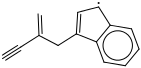
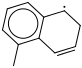
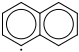
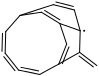
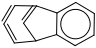
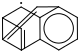
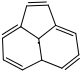
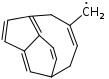
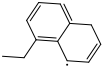
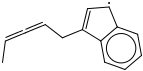
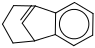
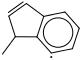
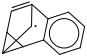
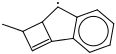
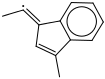
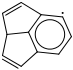
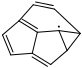
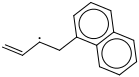
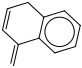
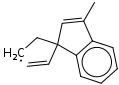
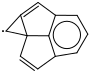
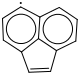
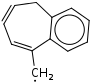
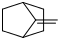
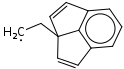
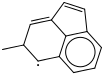
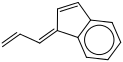
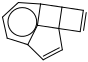
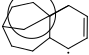
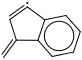
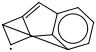
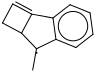
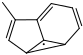
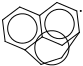
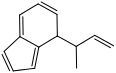
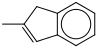
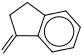
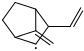
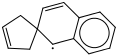
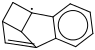
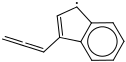
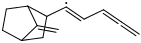
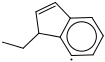
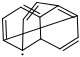
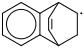
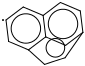
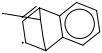
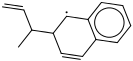
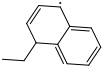
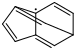
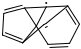
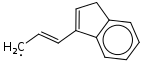
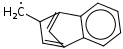
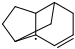
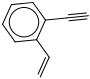
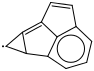
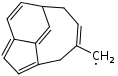
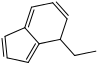
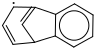
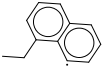
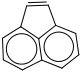
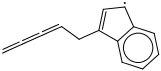
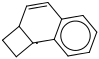
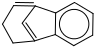
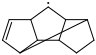
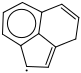
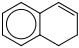
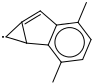
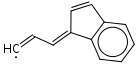
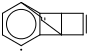
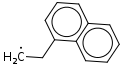
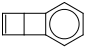
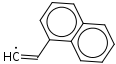
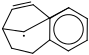
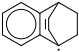
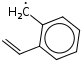
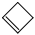
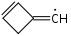
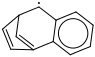
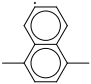
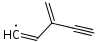
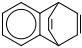
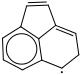
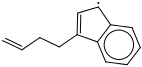
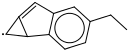
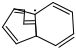
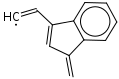
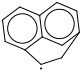
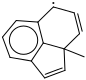
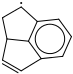
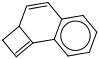
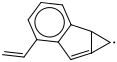
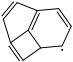
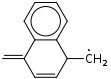
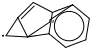
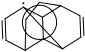
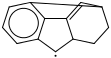
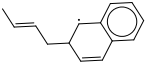
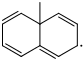
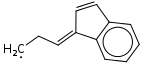
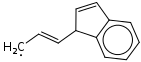
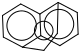
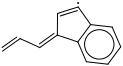
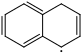
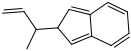
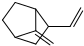
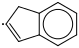
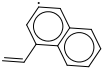
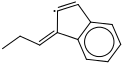
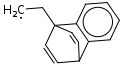
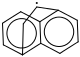
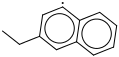
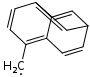
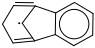
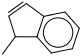
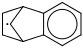
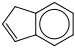
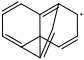
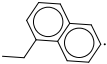
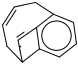
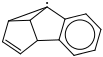
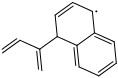
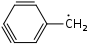
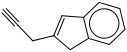
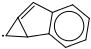
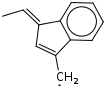
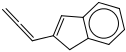
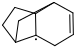
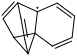
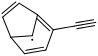
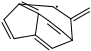
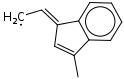
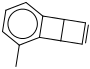
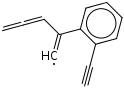
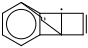
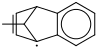
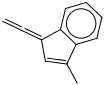
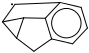
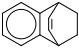
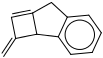
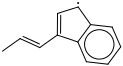
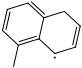
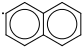
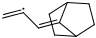
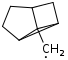
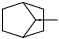
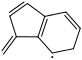
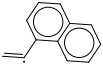
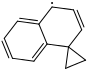
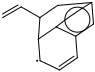
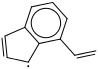
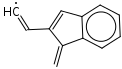
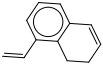
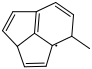
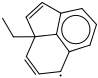
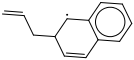
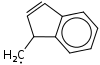
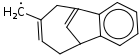
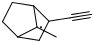
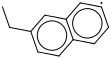
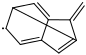
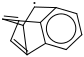
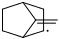
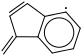
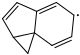
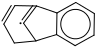
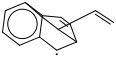
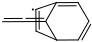
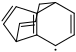
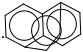
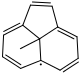
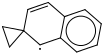
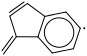
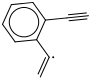
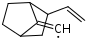
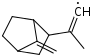
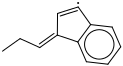
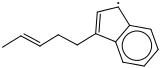
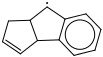
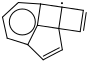
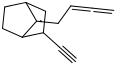
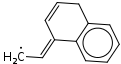
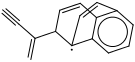
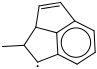
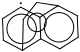
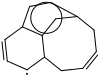
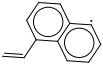
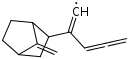
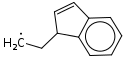
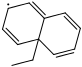
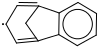
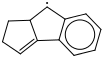
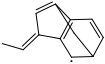
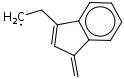
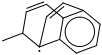
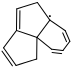
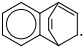
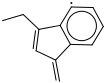
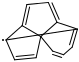
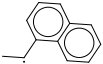
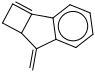
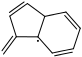
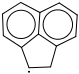
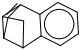
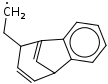
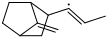
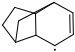
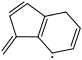
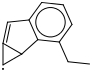
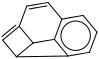
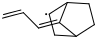
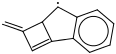
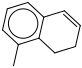
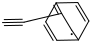
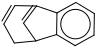
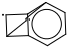
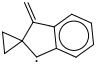
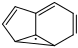
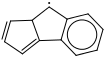
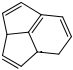
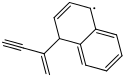
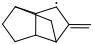
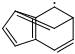
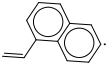
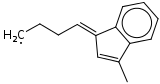
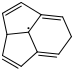
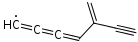
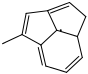
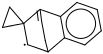
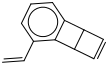
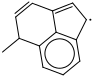
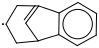
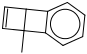
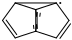
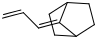
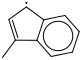
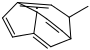
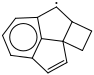
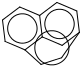
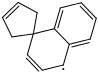
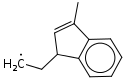
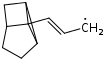
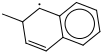
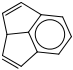
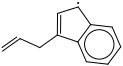
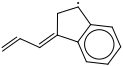
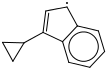
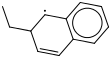
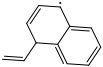
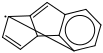
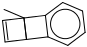
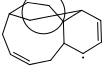
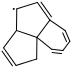
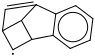
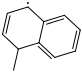
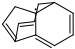
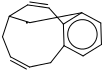
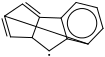
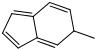
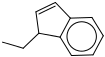
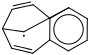
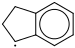
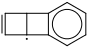
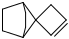
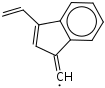
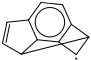
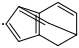
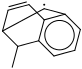
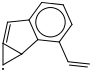
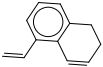
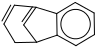
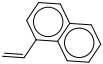
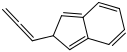
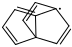
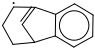
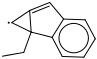
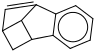
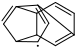
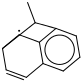
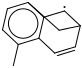
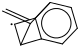
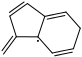
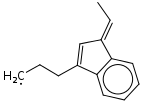
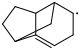
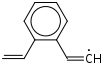
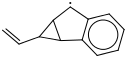
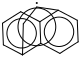
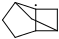
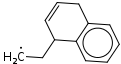
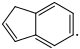
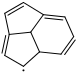
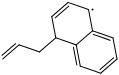
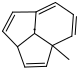
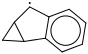
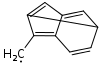
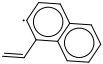
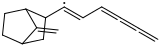
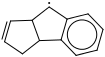
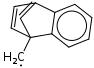
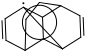
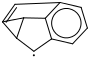
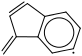
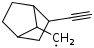
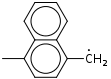
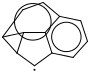
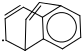
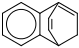
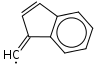
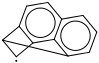
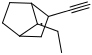
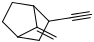
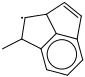
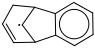
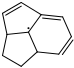
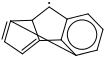
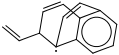
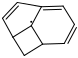
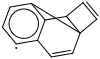
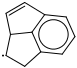
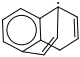
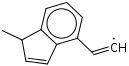
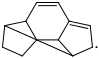
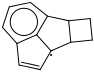
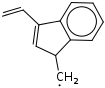
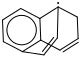
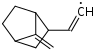
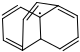
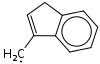
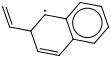
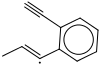
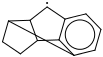
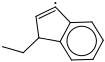
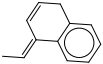
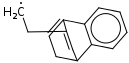
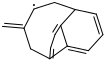
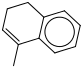
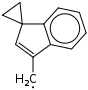
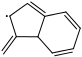
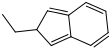
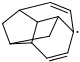
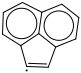
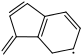
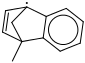
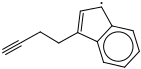
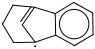
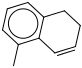
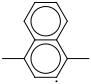
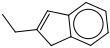
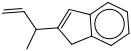
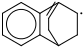
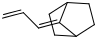
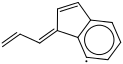
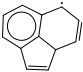
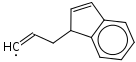
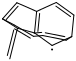
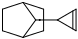
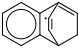
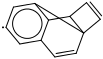
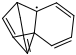
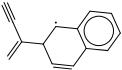
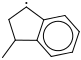
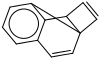
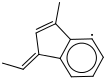
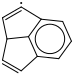
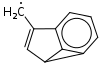
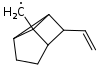
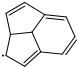
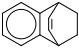
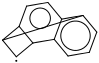
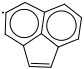
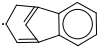
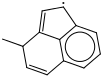
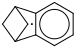
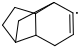
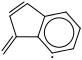
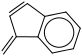
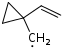
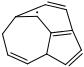
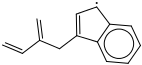
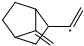
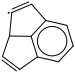
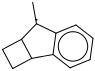
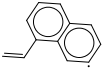
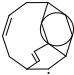
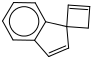
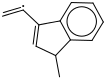
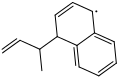
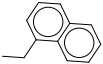
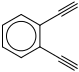
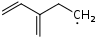
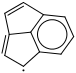
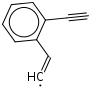
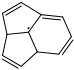
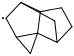
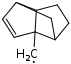
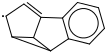
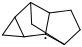
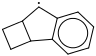
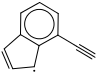
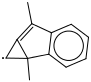
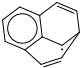
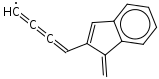
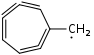
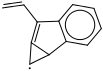
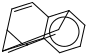
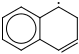
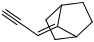
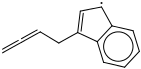
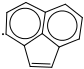
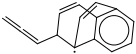
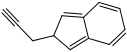
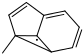
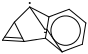
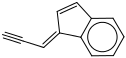
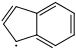
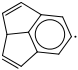
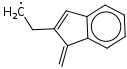
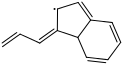
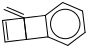
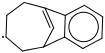
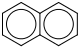
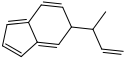
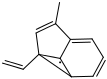
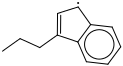
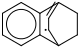
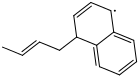
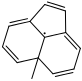
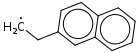
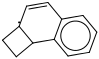
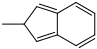
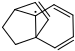
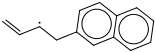
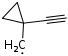
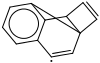
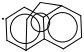
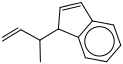
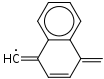
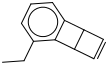
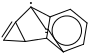
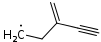
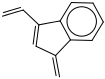
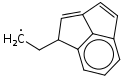
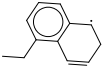
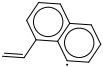
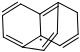
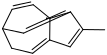
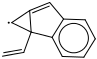
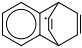
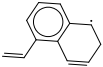
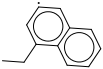
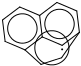
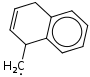
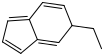
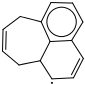
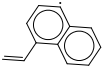
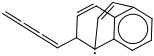
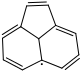
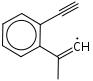
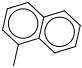
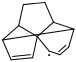
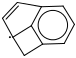
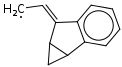
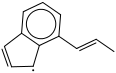
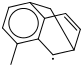
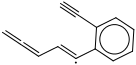
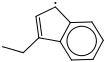
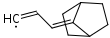
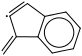
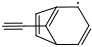
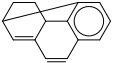
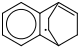
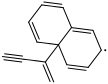
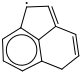
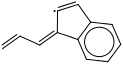

In [4]:
html = ['<table style="width:100%;table-layout:fixed;">']
for label, species in speciesDict.iteritems():
    html += ['<tr><td colspan="{0}">{1}</td>'.format(1, label)]
    html += ['<td colspan="{0}"><img src="data:image/png;base64,{1}"></td></tr>'.format(1, b64encode(species._repr_png_()))]
html += ['</table>']

display(HTML(''.join(html)))